## install library


In [2]:
! pip install scikit-fuzzy


                                              0.0/920.8 kB ? eta -:--:--
                                              0.0/920.8 kB ? eta -:--:--
                                              0.0/920.8 kB ? eta -:--:--
                                              0.0/920.8 kB ? eta -:--:--
                                              0.0/920.8 kB ? eta -:--:--
                                              0.0/920.8 kB ? eta -:--:--
                                              20.5/920.8 kB ? eta -:--:--
                                              20.5/920.8 kB ? eta -:--:--
     -                                     30.7/920.8 kB 435.7 kB/s eta 0:00:03
     -                                     30.7/920.8 kB 435.7 kB/s eta 0:00:03
     -                                     30.7/920.8 kB 435.7 kB/s eta 0:00:03
     -                                     30.7/920.8 kB 435.7 kB/s eta 0:00:03
     -                                     30.7/920.8 kB 435.7 kB/s eta 0:00:03
     -        


[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# add library

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

### Creating a fuzzy structure

In [2]:
temprature = ctrl.Antecedent(np.arange(10, 40, 1), 'temprature')
himidity = ctrl.Antecedent(np.arange(20, 100, 1), 'himidity')
fan_speed = ctrl.Consequent(np.arange(0, 100, 1), 'fan_speed')

## Create fuzzy logic

In [3]:
temprature['cold'] = fuzz.trimf(temprature.universe, [10, 10, 25])
temprature['medium'] = fuzz.trimf(temprature.universe, [15, 25, 35])
temprature['hot'] = fuzz.trimf(temprature.universe, [25, 40, 40])

himidity['dry'] = fuzz.trimf(himidity.universe, [60, 100, 100])
himidity['normal'] = fuzz.trapmf(himidity.universe, [30, 45, 75, 90])
himidity['wet'] = fuzz.trimf(himidity.universe, [10, 10, 60])


fan_speed['slow'] = fuzz.trimf(fan_speed.universe, [0, 0, 50])
fan_speed['moderate'] = fuzz.trimf(fan_speed.universe, [10, 50, 90])
fan_speed['fast'] = fuzz.trimf(fan_speed.universe, [50, 100, 100])

### Fuzzy logic display

C:\Users\parsian\PycharmProjects\first\venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


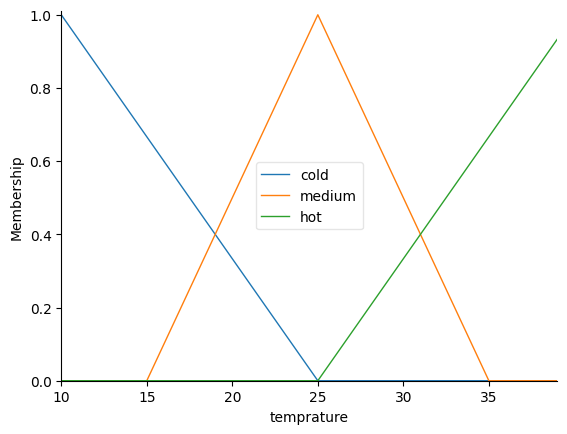

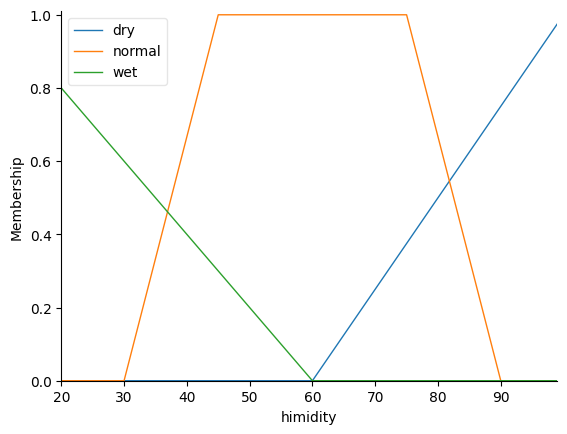

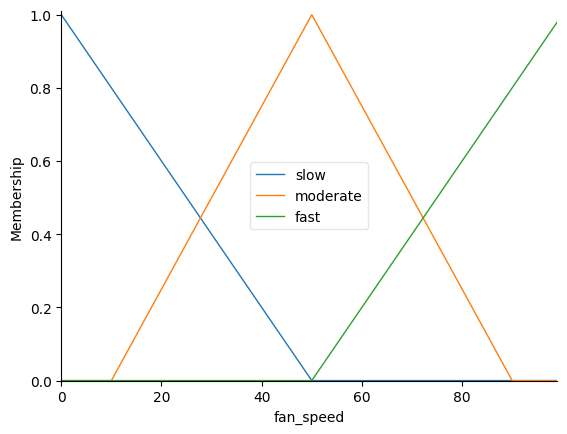

In [4]:
temprature.view()
himidity.view()
fan_speed.view()

 ### save rule

In [5]:
rule1 = ctrl.Rule(temprature['cold'] | himidity['dry'], fan_speed['slow'])
rule2 = ctrl.Rule(temprature['medium'] | himidity['dry'], fan_speed['slow'])
rule3 = ctrl.Rule(temprature['cold'] | himidity['dry'], fan_speed['slow'])

# rule defenition 2
rule4 = ctrl.Rule(temprature['cold'] | himidity['dry'], fan_speed['moderate'])
rule5 = ctrl.Rule(temprature['medium'] | himidity['normal'], fan_speed['moderate'])
rule6 = ctrl.Rule(temprature['cold'] | himidity['wet'], fan_speed['moderate'])

# rule defenition 1
rule7 = ctrl.Rule(temprature['hot'] | himidity['normal'], fan_speed['fast'])
rule8 = ctrl.Rule(temprature['hot'] | himidity['wet'], fan_speed['fast'])
rule9 = ctrl.Rule(temprature['medium'] | himidity['wet'], fan_speed['fast'])

# insert rule and predict

49.38738579244074


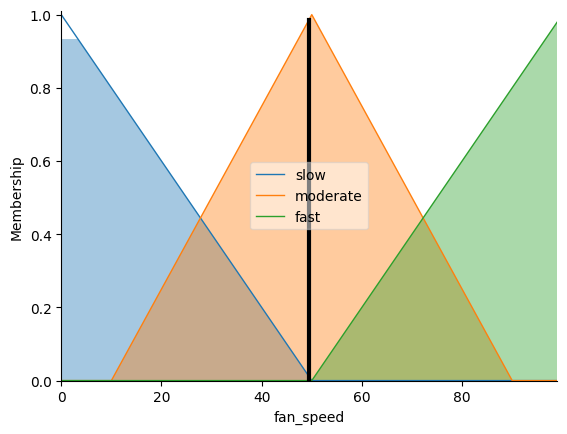

In [6]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8,rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
tipping.input['temprature'] = 11
tipping.input['himidity'] = 70
# Crunch the numbers
tipping.compute()

print (tipping.output['fan_speed'])
fan_speed.view(sim=tipping)